In [4]:
import bokeh
bokeh.sampledata.download()

Creating C:\Users\sli\.bokeh directory
Creating C:\Users\sli\.bokeh\data directory
Using data directory: C:\Users\sli\.bokeh\data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Download

In [6]:
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "ca"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="CA Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

In [7]:
from __future__ import print_function

from bokeh.layouts import row
from bokeh.models import (
    Range1d, WMTSTileSource, ColumnDataSource, HoverTool,
)
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.airports import data as airports
from bokeh.tile_providers import CARTODBPOSITRON

points_source = ColumnDataSource(airports)
title = "US Airports: Field Elevation > 1500m"

def plot(tile_source, filename):
    output_file(filename, title=title)

    # set to roughly extent of points
    x_range = Range1d(start=airports['x'].min() - 10000, end=airports['x'].max() + 10000, bounds=None)
    y_range = Range1d(start=airports['y'].min() - 10000, end=airports['y'].max() + 10000, bounds=None)

    # create plot and add tools
    p = figure(tools='wheel_zoom,pan', x_range=x_range, y_range=y_range, title=title)
    p.axis.visible = False
    hover_tool = HoverTool(tooltips=[("Name", "@name"), ("Elevation", "@elevation (m)")])
    p.add_tools(hover_tool)
    p.add_tile(tile_source)

    # create point glyphs
    p.circle(x='x', y='y', size=9, fill_color="#F46B42", line_color="#D2C4C1", line_width=1.5, source=points_source)
    return p

# create a tile source
tile_options = {}
tile_options['url'] = 'http://tile.stamen.com/terrain/{Z}/{X}/{Y}.png'
tile_options['attribution'] = """
    Map tiles by <a href="http://stamen.com">Stamen Design</a>, under
    <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>.
    Data by <a href="http://openstreetmap.org">OpenStreetMap</a>,
    under <a href="http://www.openstreetmap.org/copyright">ODbL</a>.
    """
mq_tile_source = WMTSTileSource(**tile_options)

carto = plot(CARTODBPOSITRON, 'airports_map_cartodb.html')
mq = plot(mq_tile_source, 'airports_map.html')

show(row([carto, mq]))

In [1]:
import pandas as pd
#from bokeh import bkcharts
from bokeh.charts import Chord
from bokeh.io import show, output_file
from bokeh.sampledata.les_mis import data

nodes = data['nodes']
links = data['links']

nodes_df = pd.DataFrame(nodes)
links_df = pd.DataFrame(links)

source_data = links_df.merge(nodes_df, how='left', left_on='source', right_index=True)
source_data = source_data.merge(nodes_df, how='left', left_on='target', right_index=True)
source_data = source_data[source_data["value"] > 5]  # Select those with 5 or more connections

chord_from_df = Chord(source_data, source="name_x", target="name_y", value="value")
# output_file('chord_from_df.html')
show(chord_from_df)

C:\Users\sli\AppData\Local\Continuum\Anaconda2\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


In [14]:
source_data.head()

,source,target,value,group_x,name_x,group_y,name_y
1,2,0,8,1,Mlle.Baptistine,1,Myriel
2,3,0,10,1,Mme.Magloire,1,Myriel
3,3,2,6,1,Mme.Magloire,1,Mlle.Baptistine
47,23,11,9,3,Fantine,2,Valjean
49,24,11,7,4,Mme.Thenardier,2,Valjean


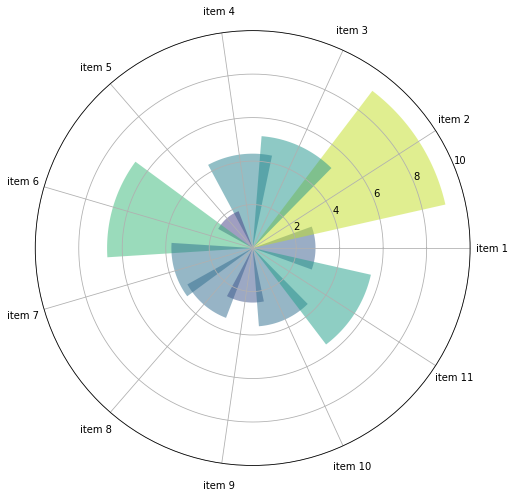

In [93]:
import numpy as np
import matplotlib.pyplot as plt

items=['item 1','item 2','item 3','item 4','item 5','item 6','item 7', 'item 8', 'item 9', 'item 10', 'item 11']
# Compute pie slices
N = len(items)
theta = np.arange(0, 2 * np.pi, 2 * np.pi/N)
radii = np.random.uniform(1, 10, N)
width = 2* np.pi / (N-2)

f=plt.figure(figsize=(8,8))
p = f.add_subplot(111, projection='polar')
bars = p.bar(theta, radii, width=width, bottom=0.0)

p.set_xticks(theta)
p.set_xticklabels(items)
p.yaxis.grid(True)
# ax.set_yticklabels()
plt.ylim(0,10)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

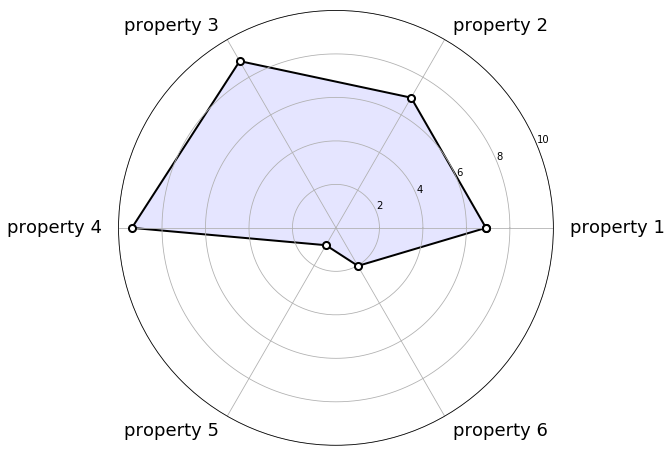

In [36]:
import numpy as np
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Data to be represented
# ----------
properties = ['property 1', 'property 2', 'property 3', 
              'property 4', 'property 5', 'property 6']
values = np.random.uniform(0,10,len(properties))
# ----------

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')

# Make figure background the same colors as axes 
fig = plt.figure(figsize=(10,8), facecolor='white')

# Use a polar axes
axes = plt.subplot(111, polar=True)

# Set ticks to the number of properties (in radians)
t = np.arange(0,2*np.pi,2*np.pi/len(properties))
plt.xticks(t, [])

# Set yticks from 0 to 10
#plt.yticks(np.linspace(0,10,5))
plt.yticks=None

# Draw polygon representing values
points = [(x,y) for x,y in zip(t,values)]
points.append(points[0])
points = np.array(points)
codes = [path.Path.MOVETO,] + \
        [path.Path.LINETO,]*(len(values) -1) + \
        [ path.Path.CLOSEPOLY ]
_path = path.Path(points, codes)
_patch = patches.PathPatch(_path, fill=True, color='blue', linewidth=0, alpha=.1)
axes.add_patch(_patch)
_patch = patches.PathPatch(_path, fill=False, linewidth = 2)
axes.add_patch(_patch)

# Draw circles at value points
plt.scatter(points[:,0],points[:,1], linewidth=2,
            s=50, color='white', edgecolor='black', zorder=10)

# Set axes limits
plt.ylim(0,10)

# Draw ytick labels to make sure they fit properly
for i in range(len(properties)):
    angle_rad = i/float(len(properties))*2*np.pi
    angle_deg = i/float(len(properties))*360
    ha = "right"
    if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
    plt.text(angle_rad, 10.75, properties[i], size=18,
             horizontalalignment=ha, verticalalignment="center")

    # A variant on label orientation
    #    plt.text(angle_rad, 11, properties[i], size=14,
    #             rotation=angle_deg-90,
    #             horizontalalignment='center', verticalalignment="center")

# Done
plt.savefig('radar-chart.png', facecolor='white')
plt.show()